# Demonstration of shifty.py's "refcat" module
 - 20191106
 - Payne 
 
The refcat module facilitates use of Tonry's refcat2 catalog
    
    - https://archive.stsci.edu/prepds/atlas-refcat2/
    - http://adsabs.harvard.edu/cgi-bin/bib_query?arXiv:1809.09157

There is a "RefCat" class
 - This handles both datadownloads and calls to the catalog

This notebook:
 - Demonstrates the key components / classes / functions available in the refcat module
 - Acts as a complement to the tests of the same module. 

#### Import statements 

In [27]:
# -------------------------------------------------------------------------------------
# Third party imports
# -------------------------------------------------------------------------------------
import numpy as np 
import matplotlib.pyplot as plt
import os, sys
import glob 
import importlib

import astropy
from astropy.io import fits
from astropy.time import Time
from astropy.units import allclose as quantity_allclose
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates.builtin_frames import FK5, ICRS, GCRS, GeocentricMeanEcliptic, BarycentricMeanEcliptic, HeliocentricMeanEcliptic, GeocentricTrueEcliptic, BarycentricTrueEcliptic, HeliocentricTrueEcliptic, HeliocentricEclipticIAU76
from astropy.constants import R_sun, R_earth

# -------------------------------------------------------------------------------------
# Local imports
# -------------------------------------------------------------------------------------
sys.path.append(os.path.join(os.path.split(os.getcwd())[0], 'shifty'))
import refcat
import preparer

importlib.reload(refcat)
importlib.reload(preparer)

<module 'preparer' from '/Users/matthewjohnpayne/Envs/shifty/shifty/preparer.py'>

### Instantiate RefCat object

In [13]:
# creation of RefCat object
RC = refcat.RefCat()

# examination of instantiated variables
# - these are defining some local data storage 
for k,v in RC.__dict__.items():
    print(k,v)


refcat_filepath /Users/matthewjohnpayne/.shifty_data/refcat/refcat
local_dir /Users/matthewjohnpayne/.shifty_data
refcat_dir /Users/matthewjohnpayne/.shifty_data/refcat
downloadable_files {'18': 'https://archive.stsci.edu/hlsps/atlas-refcat2/orig/hlsp_atlas-refcat2_atlas_ccd_17-m-18_multi_v1_cat.tbz', '16': 'https://archive.stsci.edu/hlsps/atlas-refcat2/orig/hlsp_atlas-refcat2_atlas_ccd_00-m-16_multi_v1_cat.tbz', 'code': 'https://archive.stsci.edu/prepds/atlas-refcat2/refcat.c', 'man': 'https://archive.stsci.edu/prepds/atlas-refcat2/refcat.man', '20': 'https://archive.stsci.edu/hlsps/atlas-refcat2/orig/hlsp_atlas-refcat2_atlas_ccd_19-m-20_multi_v1_cat.tbz', '19': 'https://archive.stsci.edu/hlsps/atlas-refcat2/orig/hlsp_atlas-refcat2_atlas_ccd_18-m-19_multi_v1_cat.tbz', '17': 'https://archive.stsci.edu/hlsps/atlas-refcat2/orig/hlsp_atlas-refcat2_atlas_ccd_16-m-17_multi_v1_cat.tbz'}
refcat_codename refcat


### Use RefCat to download refcat catalog(s) 
 - Note that this takes a *long* time 
 - It is downloading a huge file 
 - Then it un-tars that huge file into a directory containing 10's of thousands of files 

The downloaded file(s) will be put into a directory defined by the variable ...
 - RC.refcat_dir

If the download-file already exists on disk then it will *NOT* be downloaded again

In [9]:
# Tonry's catalog can be downloaded in 5 chunks 
# Here we are downloading the 'brighter-than'16th-magnitude' chunk
# - This is implicitly using the keys in the RC.downloadable_files() dictionary to specify what you want to download
RC.download_refcat(16)

 ------Downloading catalogue file(s) ----------


In [4]:
# Here we are downloading all of the available catalogs 
RC.download_refcat( 16, 17, 18, 19, 20 )

 ------Downloading catalogue file(s) ----------
 ------Downloading catalogue file(s) ----------
https://archive.stsci.edu/hlsps/atlas-refcat2/orig/hlsp_atlas-refcat2_atlas_ccd_16-m-17_multi_v1_cat.tbz --->>> /Users/matthewjohnpayne/.shifty_data/refcat/hlsp_atlas-refcat2_atlas_ccd_16-m-17_multi_v1_cat.tbz


KeyboardInterrupt: 

### Use RefCat to download refcat code
 - This is quick 

In [5]:
RC.download_refcode()

### Use RefCat to compile refcat code
 - This is quick (if it works) 
 - Requires that your machine have relevant (cc) compiler
 - I have *NOT* attempted to generalize beyond the method Tonry suggests 

In [14]:
RC.compile_refcat()

### Use RefCat to search source catalogs 

In [24]:
 # The following is taken from refcat.man
# - Report all stars within a radius of 1 deg from RA, Dec 180,10.
# - Request input file extension ".rc2" explicitly and a header line
# - (1064 stars, output in ATLAS format):
# >>> refcat 180 10 -rad 1 -dir 00_m_16 -exten rc2 -hdr
# -----------------------------------------
ra = 180
dec = 10
rad = 1
mlim = 17
code = RC.refcat_filepath
dir = os.path.join(RC.refcat_dir, '00_m_16')
result = RC._read_refcat(ra, dec, code, dir,
                     rad=rad , mlim=mlim )

# check the results are as expected 
expectedvalues  = ['ra', 'dec', 'g', 'r', 'i', 'z', 'J', 'c', 'o']
expected_number_sources = 1064
if isinstance(result, dict) and \
    len(result) == expected_number_sources and \
    np.all( [ len(k) == 2  for k in result.keys() ] ) and \
    np.all( [ len(v) == len(expectedvalues) for v in result.values() ] ): 
    print('The expected number of sources was found [%r]' % expected_number_sources)
    
# illustrate a sample of the results 
print("Here is a sample of %d data points" % n_rows_to_print)
for key in expectedvalues:
    print('%10s' % key, end=',')
print()
n_rows_to_print = 5
for i in range(n_rows_to_print):
    for v in result[ list(result.keys())[i] ]:
        print('%10f' % v , end=',')
    print()

The expected number of sources was found [1064]
Here is a sample of 5 data points
        ra,       dec,         g,         r,         i,         z,         J,         c,         o,
180.060518, 10.725519, 16.271000, 15.208000, 14.758000, 14.554000, 13.349000, 15.720000, 14.990000,
180.381614,  9.792074, 17.676000, 16.494000, 15.785000, 15.481000, 14.208000, 17.057000, 16.135000,
180.239526, 10.542559, 12.154000, 11.047000, 10.519000, 10.272000,  0.000000, 11.578000, 10.788000,
180.127780,  9.783440, 16.364000, 15.488000, 16.762000, 16.564000, 14.173000, 15.918000, 15.906000,
180.331481, 10.720891, 13.468000, 13.040000, 12.903000, 12.856000, 11.915000, 13.259000, 12.978000,


In [49]:
# Test creation of RefCat object
# -----------------------------------------
RC = refcat.RefCat()
assert isinstance(RC , refcat.RefCat ), \
    'RefCat did not get created as expected'

# Need to create header, image_data to pass into *find_all_stars_on_image()*
# -----------------------------------------
T = preparer.TESSImagePreparer()
list_of_HDUs = T._load_test_images()
header  = list_of_HDUs[0][1].header
data    = list_of_HDUs[0][1].data

# run the script *find_all_stars_on_image()*
# -----------------------------------------
ra, dec, pix, int_pix = RC.find_all_stars_on_image(header , data )

              **              WARNING: HARD-CODED MAG-LIMITS & SEARCH DIRECTORIES IN find_all_stars_on_image()              **              


Pixel value of sources ... translated by -1, -1 to match with positions in data-array from fits


(0, 50)

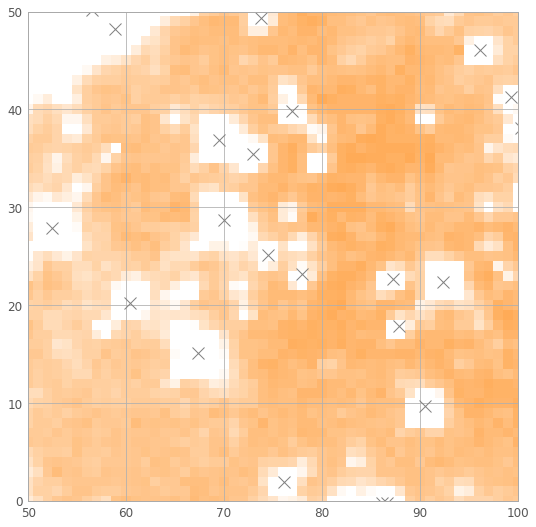

In [50]:
# set up plot environment 
# -----------------------------------------
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
fig, ax0 = plt.subplots(1, 1, figsize=(9,9))

# plot the full FFI
# -----------------------------------------
cb = ax0.imshow(data,  vmin=85.00, vmax=150.)

# plot the sources from refcat
# -----------------------------------------
ax0.plot(pix[0]-1, pix[1]-1, 'x', color='gray', alpha=2. , ms=12.)
xmin, xmax, ymin, ymax = 50,100,0,50
print('Pixel value of sources ... translated by -1, -1 to match with positions in data-array from fits')
for xp, yp in zip(pix[0], pix[1]):
    if xp > xmin and xp < xmax and yp > ymin and yp < ymax:
        pass #print(xp-1, yp-1)
ax0.set_xlim([xmin, xmax])
ax0.set_ylim([ymin, ymax])
ax1.set_xlim([xmin, xmax])
ax1.set_ylim([ymin, ymax])
#fig.colorbar(cb)